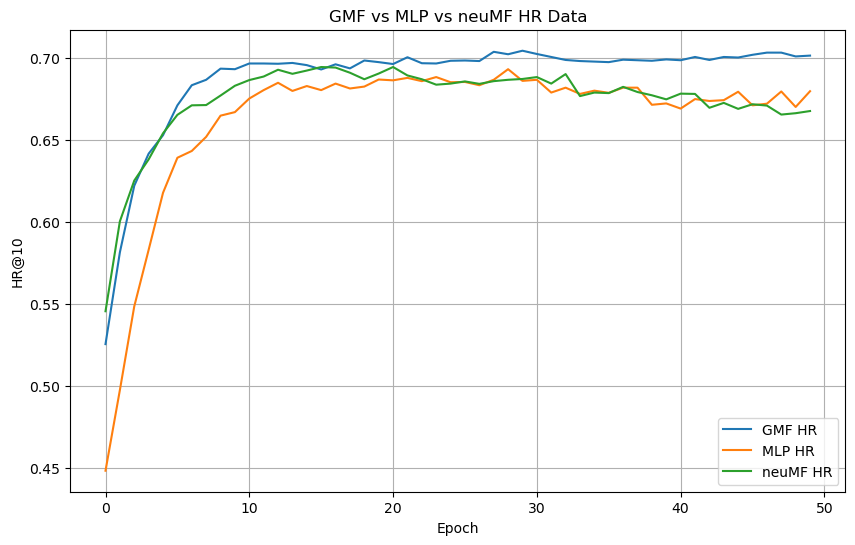

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
gmf_data = pd.read_csv('my_data_test/gmf_HR_32.csv')
mlp_data = pd.read_csv('my_data_test/mlp_HR_4layer_128.csv')
neumf_data = pd.read_csv('my_data_test/neumf_HR_6layer.csv')

# Extract the Step and Value columns for each dataset
gmf_steps = gmf_data['Step']
gmf_values = gmf_data['Value']

mlp_steps = mlp_data['Step']
mlp_values = mlp_data['Value']

neumf_steps = neumf_data['Step']
neumf_values = neumf_data['Value']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(gmf_steps, gmf_values, linestyle='-', label='GMF HR')
plt.plot(mlp_steps, mlp_values, linestyle='-', label='MLP HR')
plt.plot(neumf_steps, neumf_values, linestyle='-', label='neuMF HR')
plt.title('GMF vs MLP vs neuMF HR Data')
plt.xlabel('Epoch')
plt.ylabel('HR@10')
plt.legend()
plt.grid(True)

# Save the figure with higher PPI (DPI)
plt.savefig('HR.png', dpi=300)  # DPI set to 300 for higher resolution
plt.show()


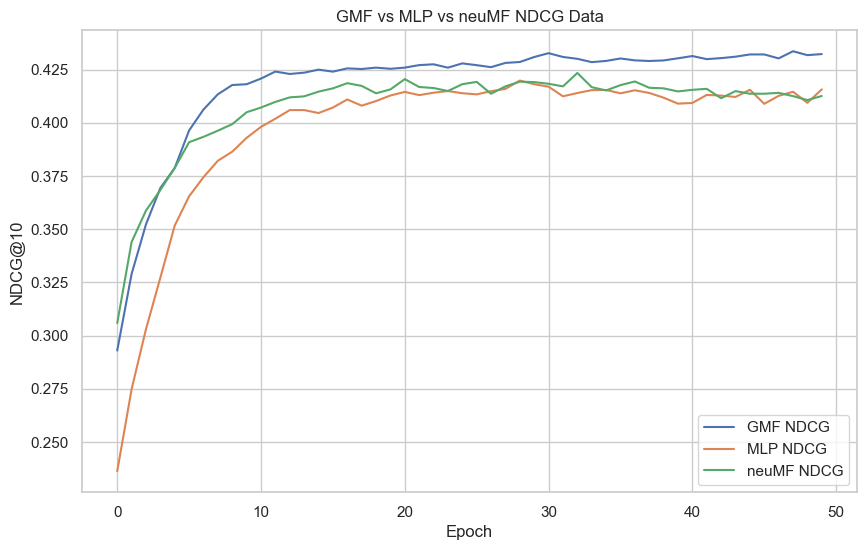

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
gmf_data = pd.read_csv('my_data_test/gmf_NDCG_32.csv')
mlp_data = pd.read_csv('my_data_test/mlp_NDCG_4layer_128.csv')
neumf_data = pd.read_csv('my_data_test/neumf_NDCG_6layer.csv')

# Extract the Step and Value columns for each dataset
gmf_steps = gmf_data['Step']
gmf_values = gmf_data['Value']

mlp_steps = mlp_data['Step']
mlp_values = mlp_data['Value']

neumf_steps = neumf_data['Step']
neumf_values = neumf_data['Value']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(gmf_steps, gmf_values, linestyle='-', label='GMF NDCG')
plt.plot(mlp_steps, mlp_values, linestyle='-', label='MLP NDCG')
plt.plot(neumf_steps, neumf_values, linestyle='-', label='neuMF NDCG')
plt.title('GMF vs MLP vs neuMF NDCG Data')
plt.xlabel('Epoch')
plt.ylabel('NDCG@10')
plt.legend()
plt.grid(True)

# Save the figure with higher PPI (DPI)
plt.savefig('NDCG.png', dpi=300)  # DPI set to 300 for higher resolution
plt.show()


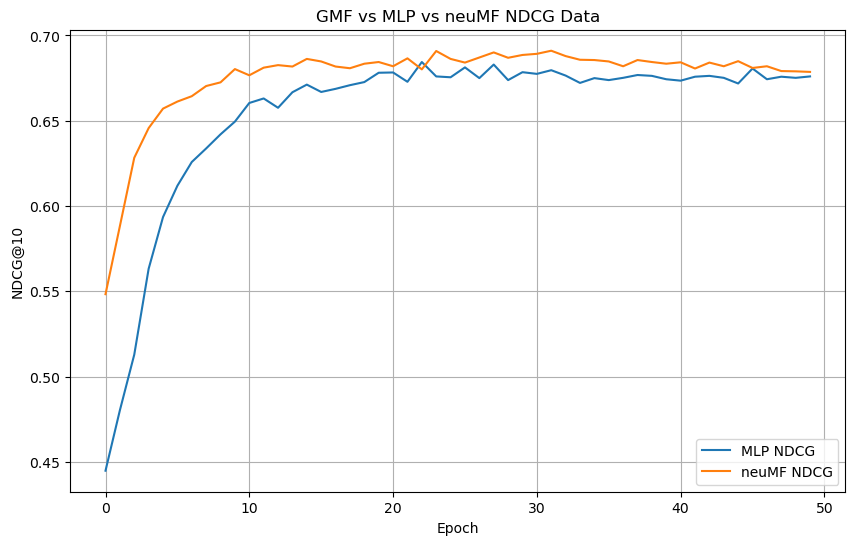

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
# gmf_data = pd.read_csv('my_data_test/gmf_NDCG.csv')
mlp_data = pd.read_csv('my_data_test/mlp_HR_5layer.csv')
neumf_data = pd.read_csv('my_data_test/neumf_HR_5layer.csv')

# # Extract the Step and Value columns for each dataset
# gmf_steps = gmf_data['Step']
# gmf_values = gmf_data['Value']

mlp_steps = mlp_data['Step']
mlp_values = mlp_data['Value']

neumf_steps = neumf_data['Step']
neumf_values = neumf_data['Value']

# Plot the data
plt.figure(figsize=(10, 6))
# plt.plot(gmf_steps, gmf_values, linestyle='-', label='GMF NDCG')
plt.plot(mlp_steps, mlp_values, linestyle='-', label='MLP NDCG')
plt.plot(neumf_steps, neumf_values, linestyle='-', label='neuMF NDCG')
plt.title('GMF vs MLP vs neuMF NDCG Data')
plt.xlabel('Epoch')
plt.ylabel('NDCG@10')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
gmf_data = pd.read_csv('my_data_test/neumf_HR_6layer.csv')
gmf_data['Value'].max()

0.6945364238410596

In [24]:
gmf_data = pd.read_csv('my_data_test/neumf_NDCG_6layer.csv')
gmf_data['Value'].max()

0.4234190333902151